In [24]:
import numpy as np
import matplotlib.pyplot as plt
N = 10

### Méthode de la puissance itérée( aka степенные итерации )

Уже знакомая нам матрица

In [25]:
def Mmm(N=N):
    
    M = np.zeros((N,N))
    for i in range(1, N-1):
        M[i,i-1] = M[i, i+1] = 1
        M[i,i] = -2

    return M

Они самые

In [26]:
rndm = np.random.RandomState(8)

def powpow(M, N=N, n=N):
    x = rndm.rand(N)  
    for _ in range(n):
        x = (M @ x) / np.linalg.norm (M @ x)
        
    v = (x.T @ M @ x) / (x.T @ x)
    return v, x

Пробуем

In [27]:
M = Mmm()
w_true, v = np.linalg.eig(M)
w_try, v_ = powpow(M, N, 100)
print('true: ', w_true[0])
print('\nтоже true, но иновационным методом: ', w_try)
#print(v,'\n--------\n', v_)

true:  -3.8793852415718124

тоже true, но иновационным методом:  -3.87938524046573


Все получается, первое-главное значение нашли! Думаю, что точность в 6 знаков мне нравится:)

Чтобы увидеть насколько сильно это может понравиться всем остальным, построим график для разного числа итераций:

<IPython.core.display.Javascript object>


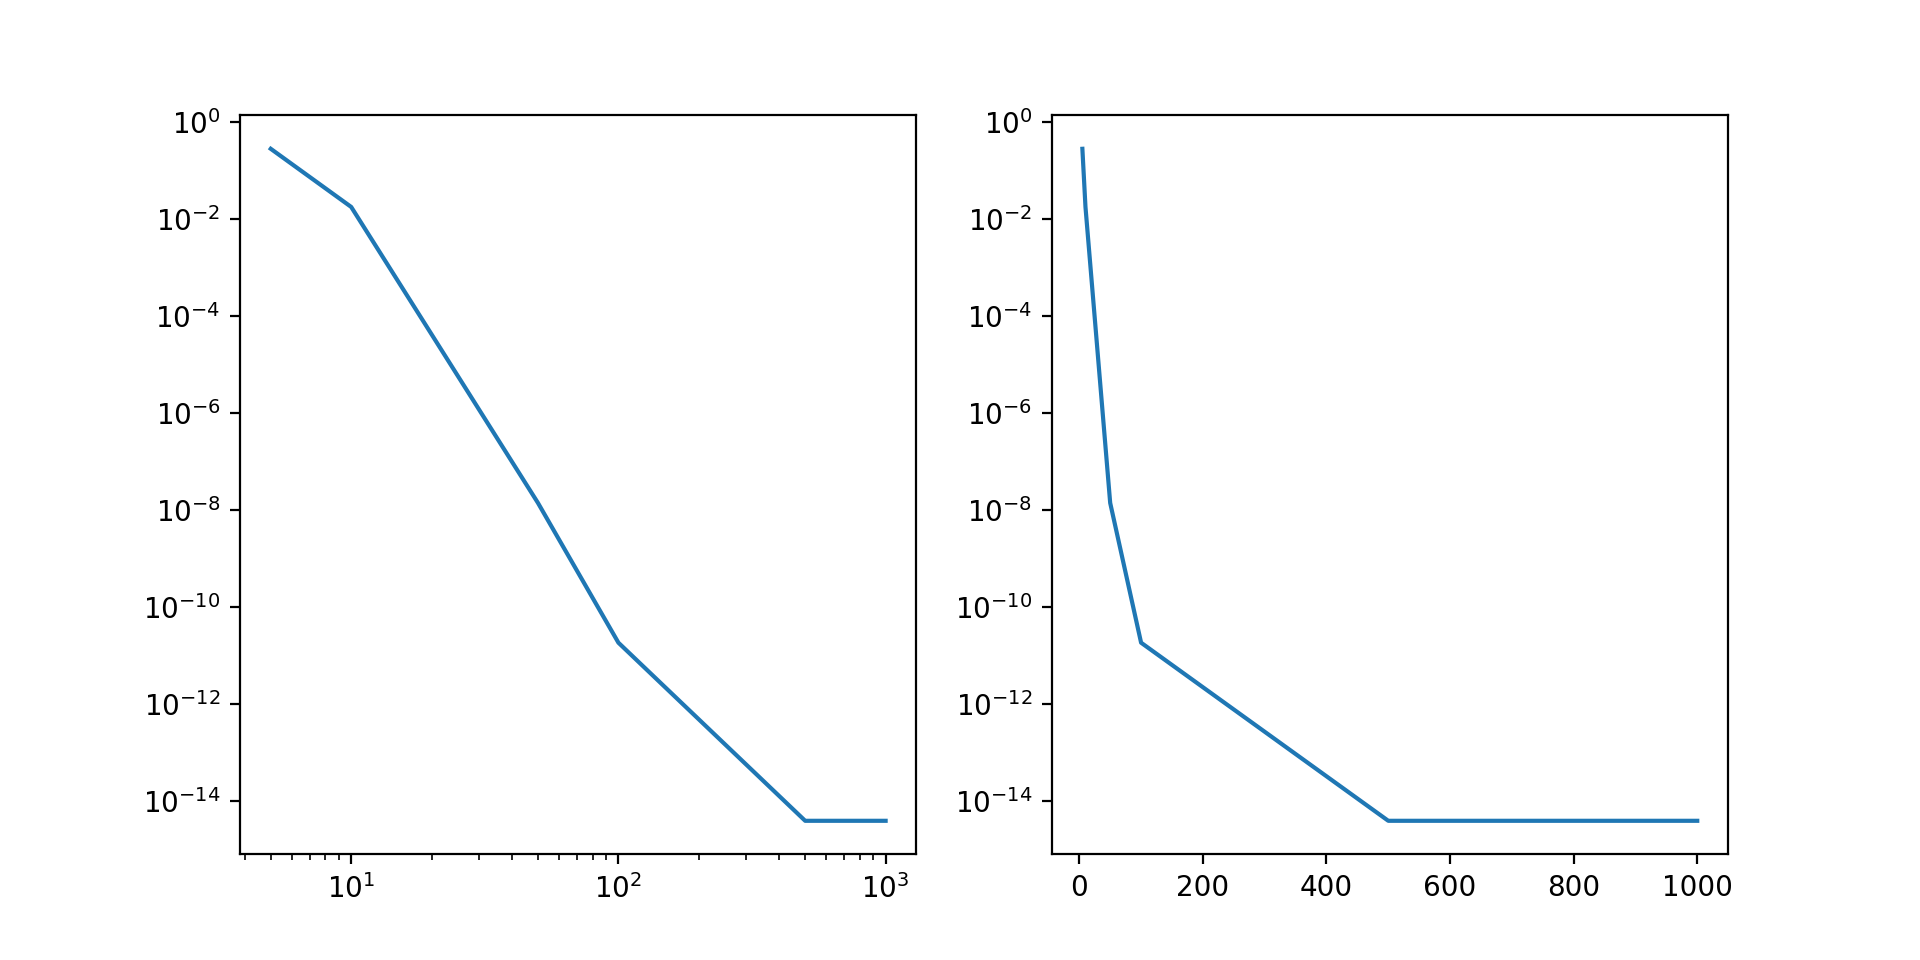

In [44]:
%matplotlib notebook
nn = np.array([5, 10, 50, 100, 500, 1000])
dw = np.ones(6)
i = 0
for n in nn:
    w_true, v = np.linalg.eig(M)
    w_try, v_ = powpow(M, N, n)
    dw[i] = np.abs(w_true[0]-w_try)
    i += 1
#print
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1)
plt.xscale('log')
plt.yscale('log')
plt.plot(nn, dw)

ax = fig.add_subplot(1, 2, 2)
#plt.xscale('log')
plt.yscale('log')
plt.plot(nn, dw)

Два графика на любой вкус, один дважды логарифмический, другой - только по 0Y7 
Как ни крути, точность растете как степенная функция числа итераций!(это круто)